In [1]:
import pandas as pd
import numpy as np
import skimage
import matplotlib.pyplot as plt

# Human Protein Atlas

In [2]:
# Whole images: /scr/mdoron/Dino4Cells/data/whole_images/
# Metadata: /scr/mdoron/Dino4Cells/data/whole_images.csv

In [2]:
hpa_wi = pd.read_csv("/scr/mdoron/Dino4Cells/data/whole_images.csv")

In [3]:
im = skimage.io.imread(hpa_wi.loc[40000,"file"])

In [5]:
im.shape

(2048, 2048, 4)

In [168]:
def hpa_show(im, a=0, b=-1, w=5, h=5):
    microtu = im[a:b,:,0]
    protein = im[a:b,:,1]
    nucleus = im[a:b,:,2]
    ereticu = im[a:b,:,3]

    RGB = np.zeros((nucleus.shape[0], nucleus.shape[1], 3))

    RGB += microtu[:,:,np.newaxis] * np.asarray([[[1,0,0]]])
    RGB += protein[:,:,np.newaxis] * np.asarray([[[0,1,0]]])
    RGB += nucleus[:,:,np.newaxis] * np.asarray([[[0,0,1]]])
    #RGB += ereticu[:,:,np.newaxis] * np.asarray([[[1,1,0]]])
    RGB = RGB / 255.

    plt.figure(figsize=(w,h))
    plt.imshow(RGB)
    plt.axis('off')

    fig, ax = plt.subplots(2,2,constrained_layout=False, figsize=(w,h))
    ax[0,0].imshow(microtu[:,:,np.newaxis] * np.asarray([[[1,0,0]]]))
    ax[0,0].axis('off')
    ax[0,0].set_aspect('equal')
    ax[0,1].imshow(protein[:,:,np.newaxis] * np.asarray([[[0,1,0]]]))
    ax[0,1].axis('off')
    ax[0,1].set_aspect('equal')
    ax[1,0].imshow(nucleus[:,:,np.newaxis] * np.asarray([[[0,0,1]]]))
    ax[1,0].axis('off')
    ax[1,0].set_aspect('equal')
    ax[1,1].imshow(ereticu[:,:,np.newaxis] * np.asarray([[[1,1,0]]]))
    ax[1,1].axis('off')
    ax[1,1].set_aspect('equal')

    fig.tight_layout()
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.01)
    plt.show()
    return RGB


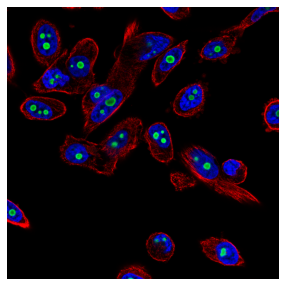

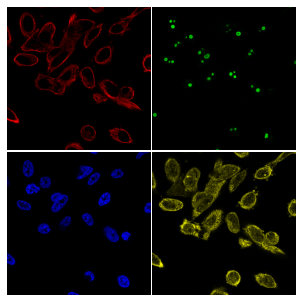

In [7]:
a = im.shape[0]//3
b = a*2
hpa_show(im)#, a, b)

# Human Protein Altas - Single cells

In [8]:
# Single cells: /scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells
# Metadata: /scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_for_sc.csv

In [9]:
hpa_sc = pd.read_csv("/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_for_sc.csv")

In [10]:
scim = skimage.io.imread(hpa_sc.loc[629632,"file"])

309982


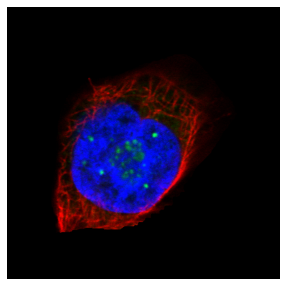

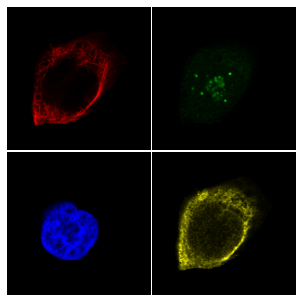

340600


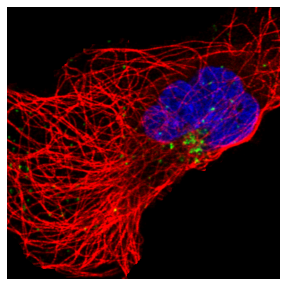

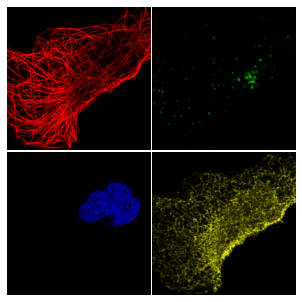

573936


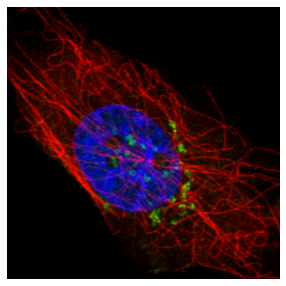

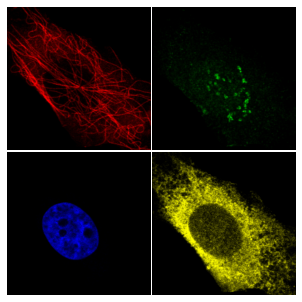

68986


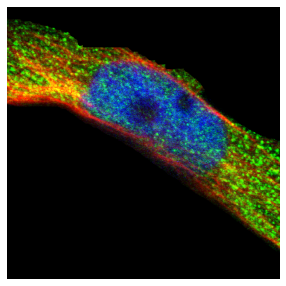

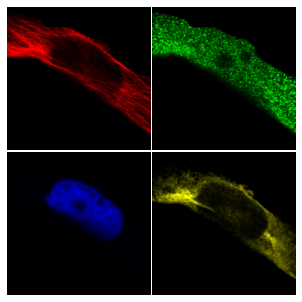

192452


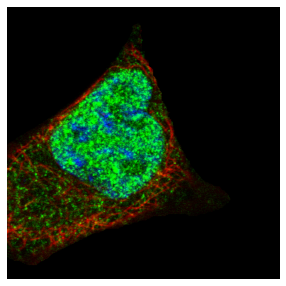

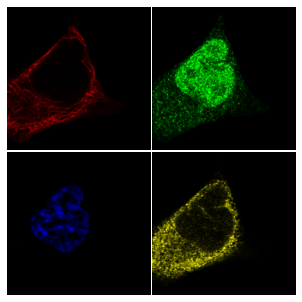

170423


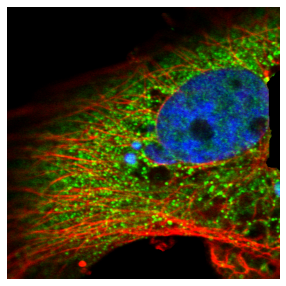

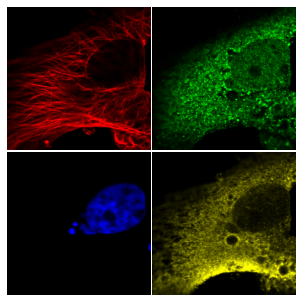

553302


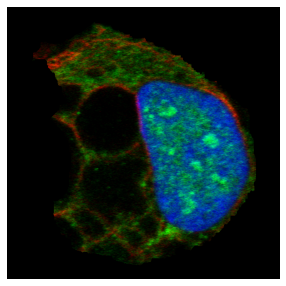

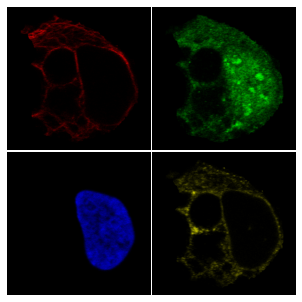

591922


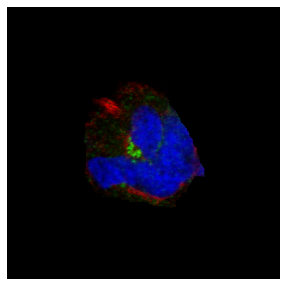

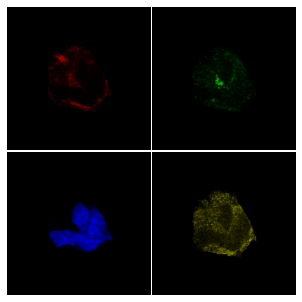

186511


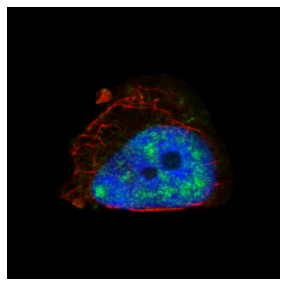

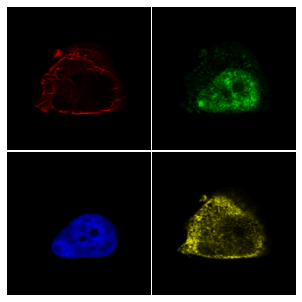

541598


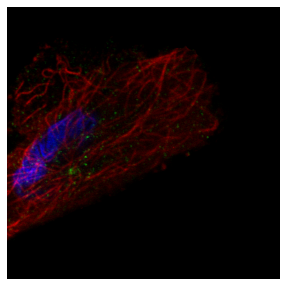

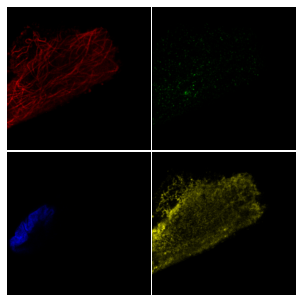

432124


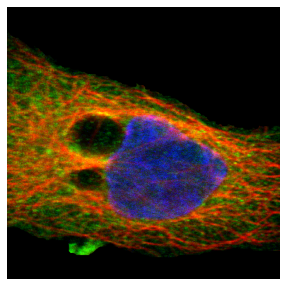

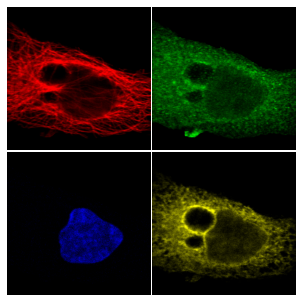

204358


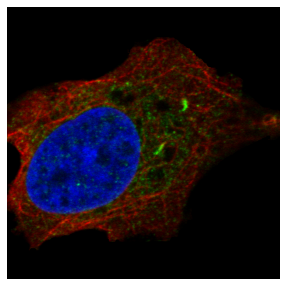

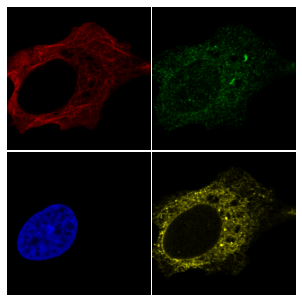

21023


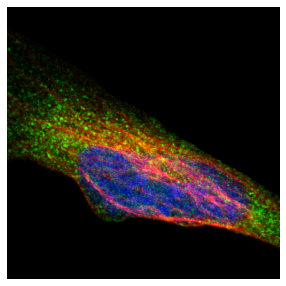

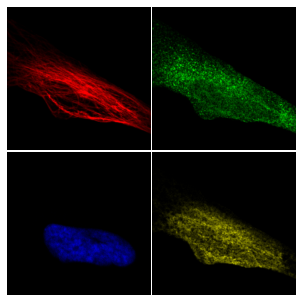

242625


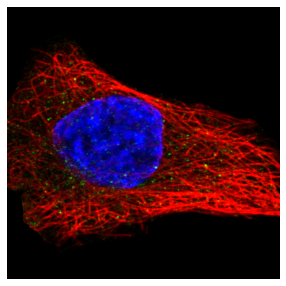

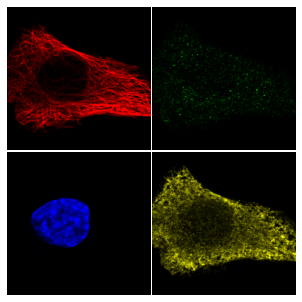

204382


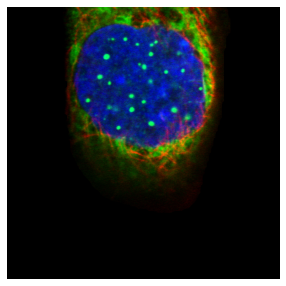

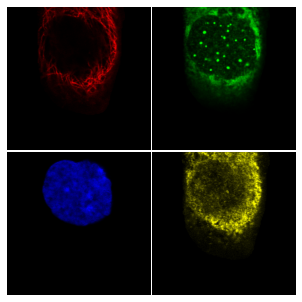

323137


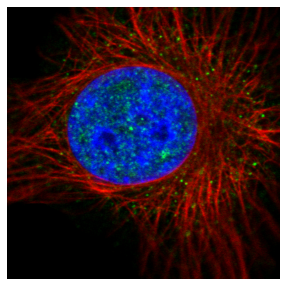

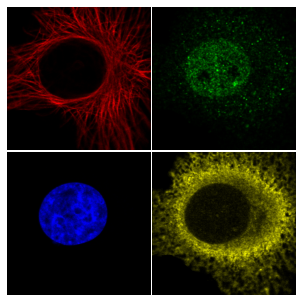

126971


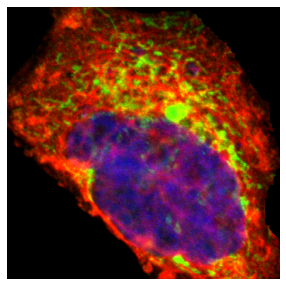

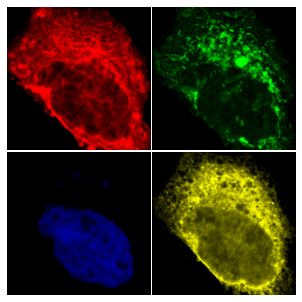

263384


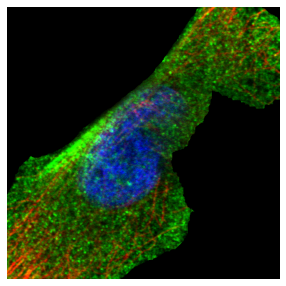

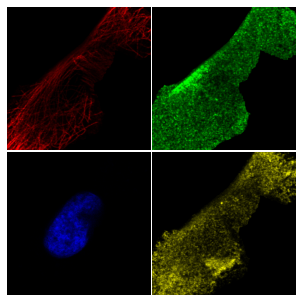

146760


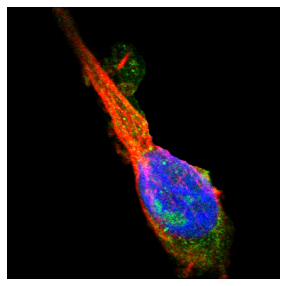

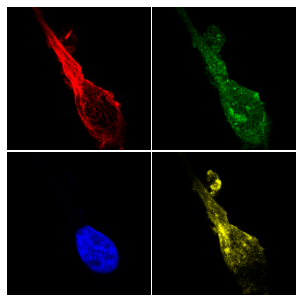

528708


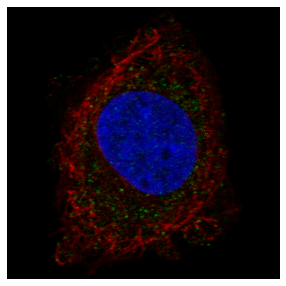

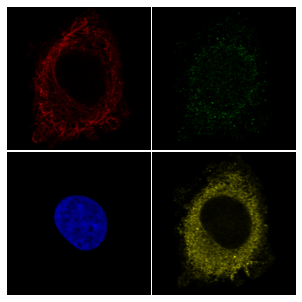

In [176]:
R = np.random.randint(0,629000,20)
for r in R:
    scim = skimage.io.imread(hpa_sc.loc[r,"file"])
    print(r)
    hpa_show(scim)

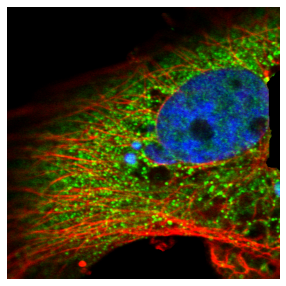

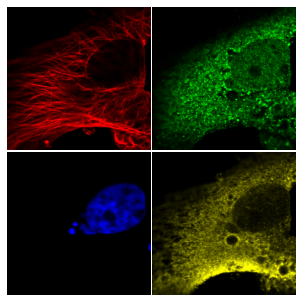

In [183]:
scim = skimage.io.imread(hpa_sc.loc[170423,"file"])
sample = hpa_show(scim)

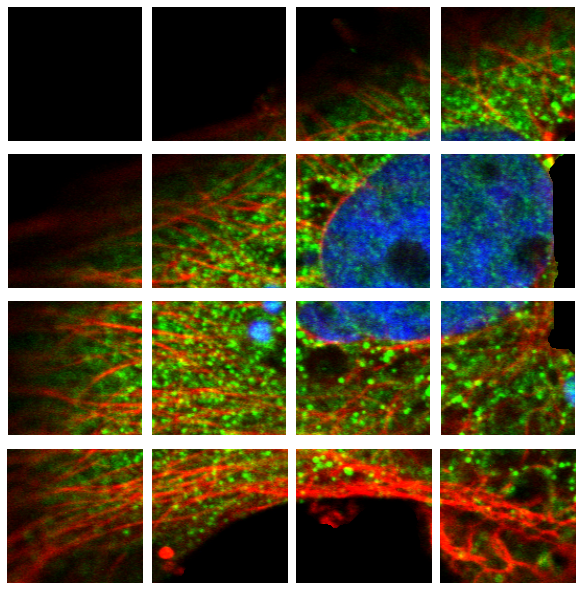

In [184]:
T = 4
S = 512//T
fig, ax = plt.subplots(T,T,figsize=(10,10))

for y in range(T):
    for x in range(T):
        ax[y,x].imshow(sample[y*S:(y+1)*S,x*S:(x+1)*S])
        ax[y,x].axis('off')

fig.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.1)


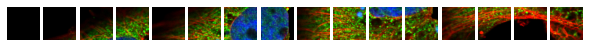

In [187]:
T = 4
S = 512//T
fig, ax = plt.subplots(1,T*T,figsize=(10,10))

for y in range(T):
    for x in range(T):
        ax[y*T + x].imshow(sample[y*S:(y+1)*S,x*S:(x+1)*S])
        ax[y*T + x].axis('off')

fig.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)


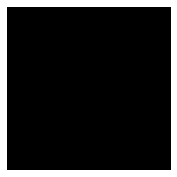

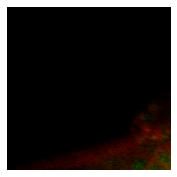

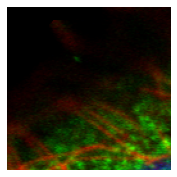

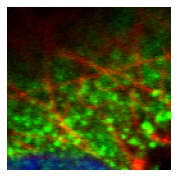

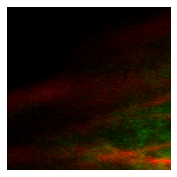

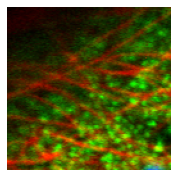

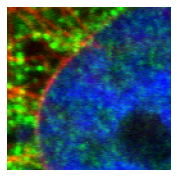

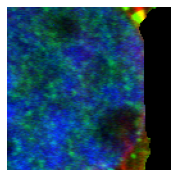

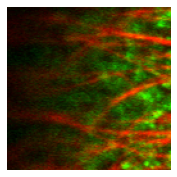

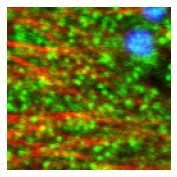

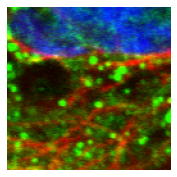

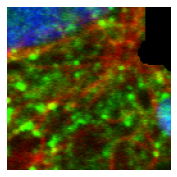

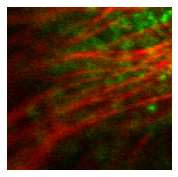

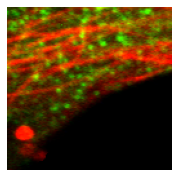

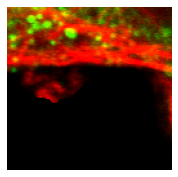

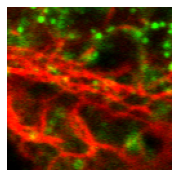

In [188]:
T = 4
S = 512//T

for y in range(T):
    for x in range(T):
        plt.figure(figsize=(3,3))
        plt.imshow(sample[y*S:(y+1)*S,x*S:(x+1)*S])
        plt.axis('off')
        plt.show()

#fig.tight_layout()
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)


# Allen Institute - Cell Explorer

In [12]:
# Allen: /scr/mdoron/allen/cell_data
# Metadata: /scr/mdoron/allen/cell_df.csv

In [45]:
allen_df = pd.read_csv("/scr/mdoron/allen/cytodata-hackathon-base/normalized_cell_df.csv")

In [5]:
aim = skimage.io.imread(allen_df.loc[30000,"file"])

In [60]:
def allen_show(aim, channel=None):
    nucleus = skimage.exposure.rescale_intensity(aim[1,:,:], out_range="uint8")
    membrane = skimage.exposure.rescale_intensity(aim[2,:,:], out_range="uint8")
    protein = skimage.exposure.rescale_intensity(aim[3,:,:], out_range="uint8")

    nuc_mask = skimage.segmentation.find_boundaries(aim[4,:,:])*255
    mem_mask = skimage.segmentation.find_boundaries(aim[5,:,:])*255

    RGB = np.zeros((aim.shape[1], aim.shape[2], 3))
    MAX = np.ones_like(RGB)*255

    N1 = nuc_mask[:,:,np.newaxis] * np.asarray([[[0,1,1]]])
    N2 = nucleus[:,:,np.newaxis] * np.asarray([[[0,1,1]]])

    M1 = mem_mask[:,:,np.newaxis] * np.asarray([[[1,0,1]]])
    M2 = membrane[:,:,np.newaxis] * np.asarray([[[1,0,1]]])

    P1 = protein[:,:,np.newaxis] * np.asarray([[[1,1,1]]])
    P2 = np.asarray(0.4*np.bitwise_or(N2, M2) + 0.6*P1, dtype=np.uint8)
    RGB = np.bitwise_or(P2, np.bitwise_or(N1, M1))
    if channel is None:
        fig, ax = plt.subplots(1,4, figsize=(12,3))
        ax[0].imshow(RGB)
        ax[0].axis('off')

        ax[1].imshow(nucleus[:,:,np.newaxis] * np.asarray([[[0,1,1]]]))
        ax[1].axis('off')

        ax[2].imshow(membrane[:,:,np.newaxis] * np.asarray([[[1,0,1]]]))
        ax[2].axis('off')

        ax[3].imshow(protein[:,:,np.newaxis] * np.asarray([[[1,1,1]]]))
        ax[3].axis('off')

    else:
        fig, ax = plt.subplots(1,1, figsize=(3,3))
        if channel == 'RGB':
            ax.imshow(RGB)
        else:
            ax.imshow([nucleus, membrane, protein][channel][:,:,np.newaxis] * np.asarray([[[0,1,1]]]))
        ax.axis('off')
    fig.tight_layout()
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.01)
    plt.show()        

In [46]:
allen_df.Structure.unique()

array(['mitochondria', 'actin filaments', 'centrioles', 'microtubules',
       'nuclear envelope', 'desmosomes', 'ER (Sec61 beta)', 'Golgi',
       'nuclear speckles', 'gap junctions', 'plasma membrane',
       'actomyosin bundles', 'tight junctions', 'actin bundles',
       'lysosomes', 'nucleoli (DFC)', 'histones', 'matrix adhesions',
       'nucleoli (GC)', 'nuclear pores', 'ER (SERCA2)',
       'adherens junctions', 'endosomes', 'peroxisomes', 'cohesins'],
      dtype=object)

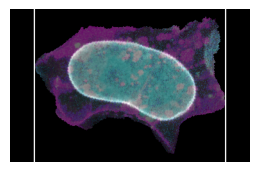

2


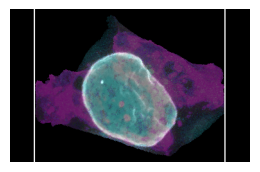

191


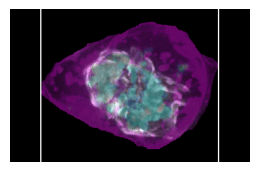

164


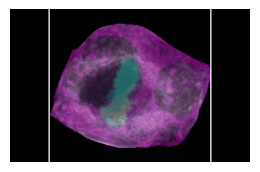

0


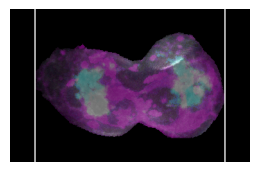

293


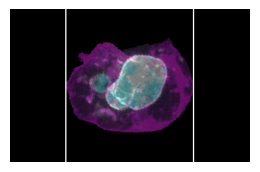

1


In [66]:
filtered_allen_df = allen_df[allen_df.Structure == 'nuclear envelope'].reset_index()
groups = filtered_allen_df.groupby('cell_stage').groups
keys = sorted(filtered_allen_df.groupby('cell_stage').groups.keys())
for key in keys:
    ind = groups[key][0]
    aim = skimage.io.imread(filtered_allen_df.loc[ind,"file"])
    A = allen_show(aim, 'RGB')
    print(ind)